In [59]:
# Membuat model untuk klasifikasi gambar menggunakan Tensorflow
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpImage
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Menyiapkan data image yang akan di proses oleh Image Data Generator
basedir = "messy_vs_clean_room"
traindir, valdir = basedir+'/train', basedir+'/val'
train_cleandir,  train_messy_dir = traindir+'/clean', traindir+'/messy'
val_cleandir,  val_messy_dir = valdir+'/clean', valdir+'/messy'

# Membuat objek image data generator untuk data training dan testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest')
test_datagen = train_datagen
# test_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     horizontal_flip=True,
#     shear_range = 0.2,
#     fill_mode = 'nearest')

In [60]:
# Menyiapkan data untuk dapat di pelajari oleh model
traingen = train_datagen.flow_from_directory(
    traindir,  # direktori data latih
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,
    # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode='binary')

valgen = test_datagen.flow_from_directory(
    valdir, # direktori data validasi
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode='binary')

# Membangun arsitektur sebuah CNN
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

Found 2188 images belonging to 3 classes.
Found 852 images belonging to 3 classes.


In [61]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy'])

# Latih model
model.fit(
    traingen,
    steps_per_epoch=25,# berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20,# tambahkan eposchs jika akurasi model belum optimal
    validation_data=valgen, # menampilkan akurasi pengujian data validasi
    validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2)

Epoch 1/20
25/25 - 72s - loss: 0.6499 - accuracy: 0.6533 - val_loss: 0.6374 - val_accuracy: 0.6667
Epoch 2/20
25/25 - 25s - loss: 0.6369 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 3/20
25/25 - 21s - loss: 0.6368 - accuracy: 0.6667 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 4/20
25/25 - 20s - loss: 0.6367 - accuracy: 0.6667 - val_loss: 0.6371 - val_accuracy: 0.6667
Epoch 5/20
25/25 - 20s - loss: 0.6368 - accuracy: 0.6667 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 6/20
25/25 - 20s - loss: 0.6368 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 7/20
25/25 - 20s - loss: 0.6367 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 8/20
25/25 - 23s - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 9/20
25/25 - 18s - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 10/20
25/25 - 15s - loss: 0.6366 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 11/

[[0.]]
[[0.]]
Clean


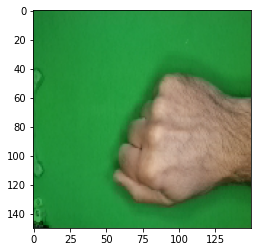

In [73]:
# Uji Machine Learning untuk menebak gambar
imgPath = "sample_room.jpg"
img = image.load_img(imgPath, target_size=(150,150))
imgplot = plt.imshow(img)
x = np.expand_dims(image.img_to_array(img), axis=0)

images = np.vstack([x])
predict = model.predict(images, batch_size=10)
if predict == 0:
    print("Clean")
else:
    print("Messy")